
![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 2: Logistic Regression SOLVED


**Resources:**
* Auréliene Géron, Hands On ML with SKlearn, Keras and TF

# Logistic Regression: theory on code

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## A logistic function

@S2C1

Saving figure logistic_function_plot


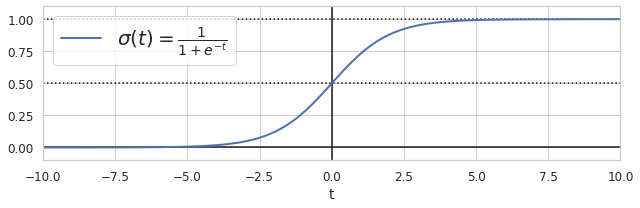

In [ ]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
save_fig("logistic_function_plot")
plt.show()

## A note in Decision Boundaries

@S2C2

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

**Note**: To be future-proof we set `solver="lbfgs"` since this will be the default value in Scikit-Learn 0.22.

The algorithm for optimization can be chosen, but beware of what the documentation says:

> Changed in version 0.22: The default solver changed from ‘liblinear’ to ‘lbfgs’ in 0.22.





In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

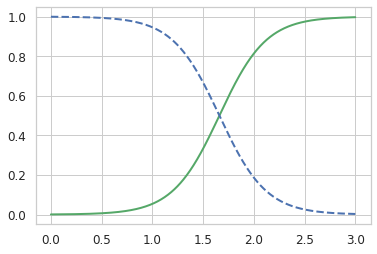

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

/usr/local/lib/python3.6/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


Saving figure logistic_regression_plot


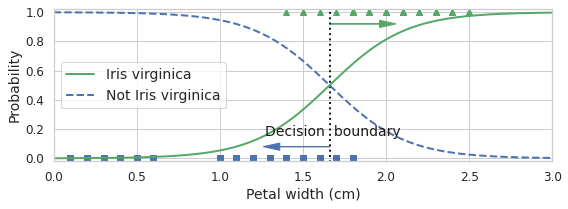

In [ ]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

In [ ]:
decision_boundary

array([1.66066066])

In [ ]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Saving figure logistic_regression_contour_plot


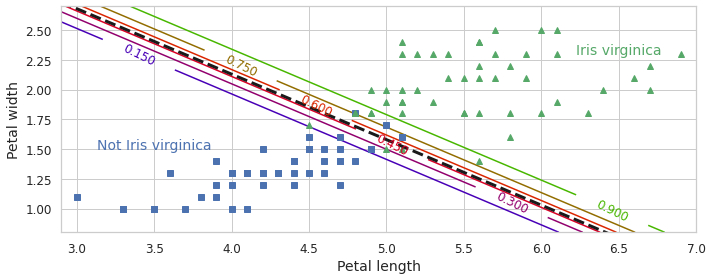

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()

In [ ]:
#supress scientific notation to 9 decimals to see probabilities
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.9f}'.format})
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.999999998, 0.000000002],
       [0.999999998, 0.000000002],
       [0.999999998, 0.000000002],
       ...,
       [0.000000000, 1.000000000],
       [0.000000000, 1.000000000],
       [0.000000000, 1.000000000]])

## Using logistic regression for multiclassification

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Saving figure softmax_regression_contour_plot


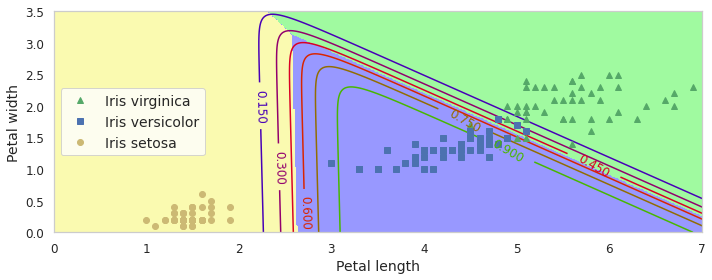

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()


# Logistic Regression Hands On

We will be working with the ```Titanic Data Set```.

It includes passenger information like name, age, gender, socio-economic class, etc. 

We want to build a model to predict a classification survival or deceased based on a specific set of features.

We will implement Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set but you may need to do some additional cleaning .

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc("font", size=18)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [2]:
data_origin = pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_2/titanic.csv')
data = data_origin.copy()

- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

## Exploratory Data Analysis and Feature Engineering

### Show the distribution of the classes

/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


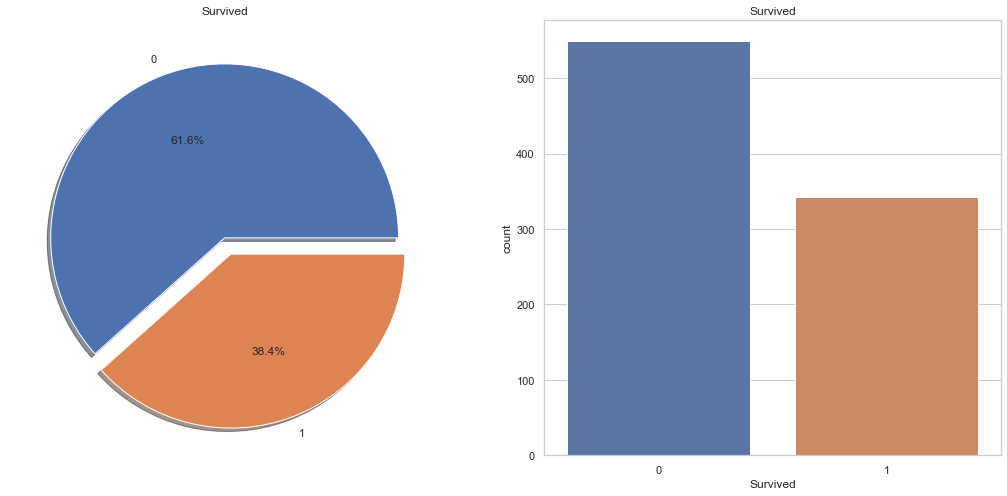

In [5]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

Not many passengers survived the accident.

## Missing Data

Look for missing data and then you will perform imputation where you think it makes sense.


In [6]:
# check missing values in train data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can use seaborn to create a simple heatmap to see where we are missing data!

<AxesSubplot:>

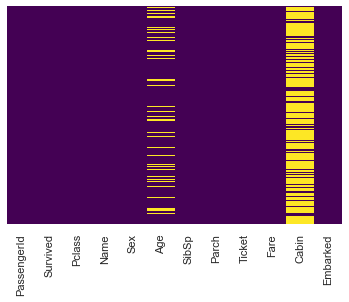

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# percent of missing "Age" 
print('Percent of missing data in column "Age" is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))

Percent of missing data in column "Age" is 19.87%


- Around 20 percent of the Age data is missing. This percentage is not so high, we can fill the missing age through imputation.

- Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this coulumn later.


##### Analyse the Age column, in general and separately for each class

/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


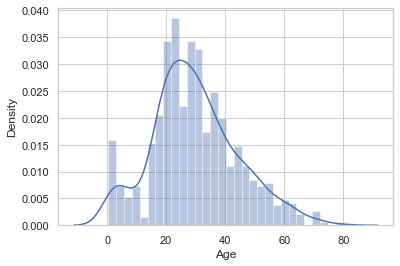

In [10]:
sns.distplot(data['Age'].dropna(), bins=30);

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Survived')

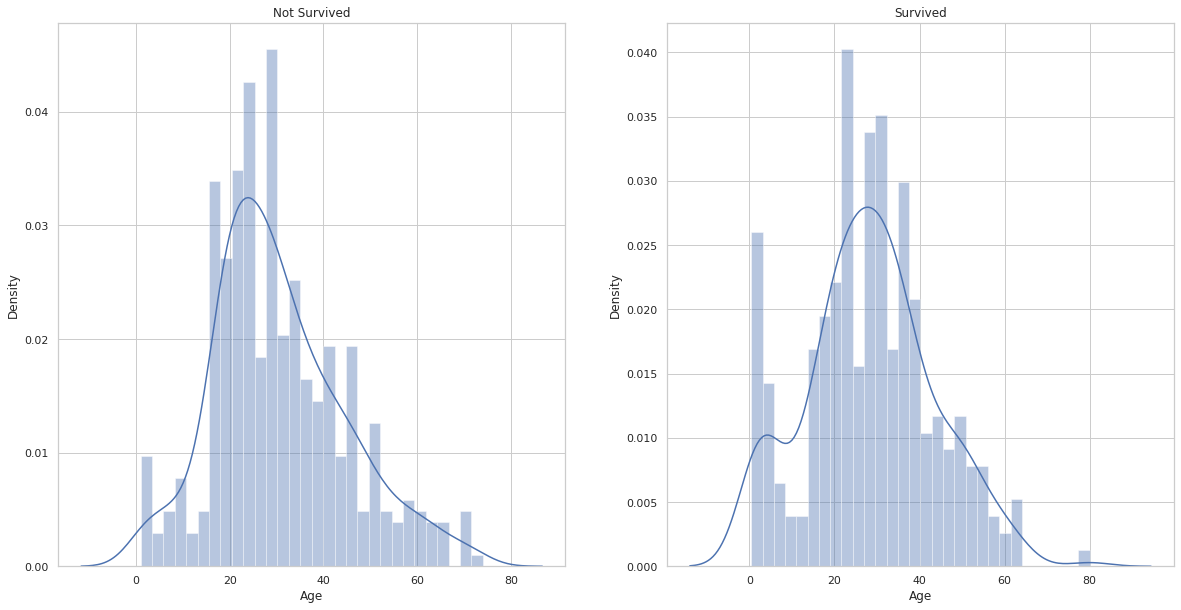

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(data[data['Survived']==0]['Age'].dropna(), bins=30, ax=ax[0]);
ax[0].set_title('Not Survived')

sns.distplot(data[data['Survived']==1]['Age'].dropna(), bins=30, ax=ax[1]);
ax[1].set_title('Survived')

Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

#### Gender

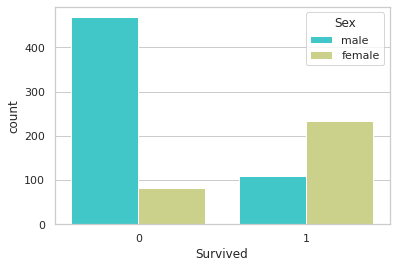

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data, palette='rainbow')

The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. 

In [ ]:
table = pd.crosstab(data.Pclass, data.Survived)
table

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [ ]:
table.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [ ]:
table.div(table.sum(1).astype(float), axis=0)

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


Text(0, 0.5, 'Percentage of survived')

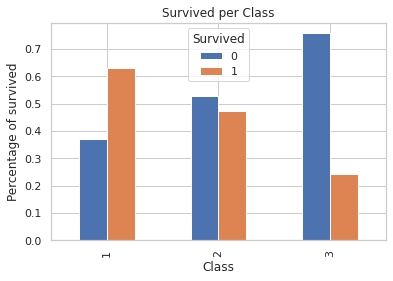

In [ ]:
table = pd.crosstab(data.Pclass, data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Survived per Class')
plt.xlabel('Class')
plt.ylabel('Percentage of survived')

We can clearly observe that passenger in Class 1 had a much higher probability to survive!

#### SibSip: This feature represents whether a person is alone or with his family members.

Text(0, 0.5, 'Percentage of survived')

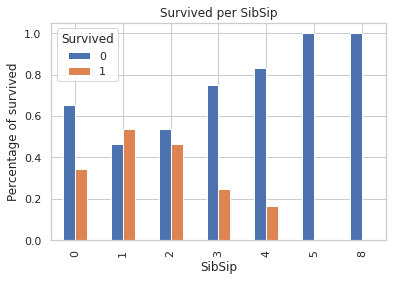

In [ ]:
table = pd.crosstab(data.SibSp, data.Survived)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Survived per SibSip')
plt.xlabel('SibSip')
plt.ylabel('Percentage of survived')

If a passenger is alone or with only one parent has good chances to Survive. roughly decreases if the number of siblings increase. Maybe if I have a family on board, I will try to save them instead of saving myself first. Notice that the survival for families with more than 5 members is 0%. 

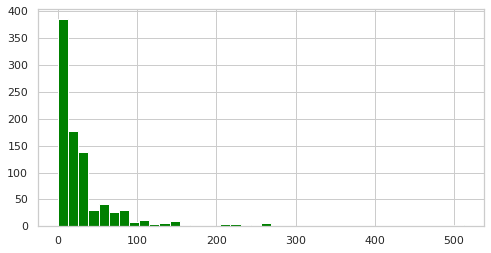

In [ ]:
data['Fare'].hist(color='green',bins=40,figsize=(8,4))

Distribution of ages per class and for survived and not survived

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

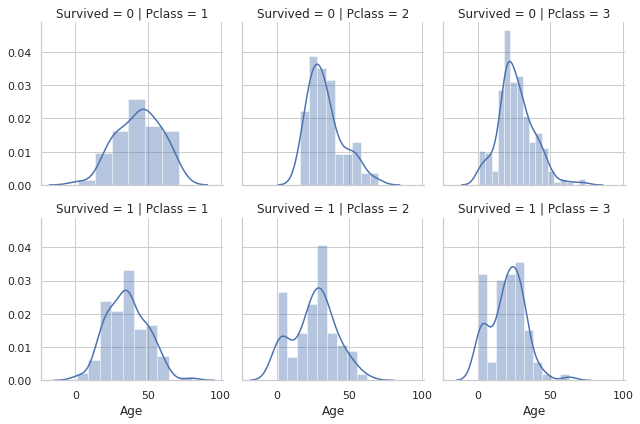

In [ ]:
g = sns.FacetGrid(data, row='Survived', col='Pclass')
g.map(sns.distplot, "Age")
plt.show()

## Data preprocessing

**Feature Engineering plays an important role in regards to the performance of Logistic**

We want to fill in missing age data instead of just dropping the missing age data rows. 

In case of missing value we will assign the median value of the passengers in the same class.


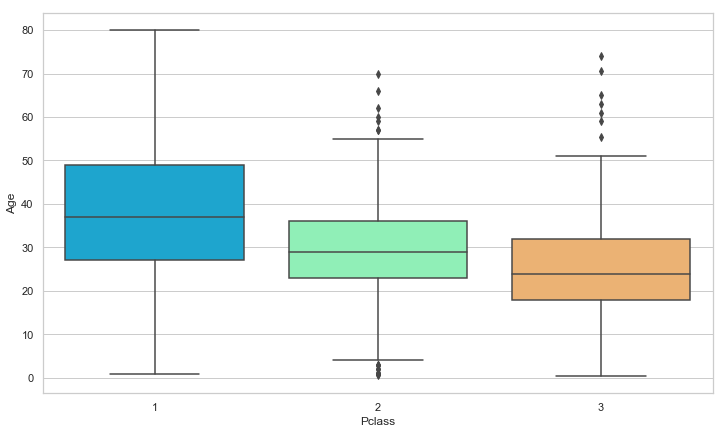

In [ ]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='rainbow')

## Naive Imputer way
Doing it without Sklearn

### Compute the median age per class

In [ ]:
data.groupby(['Pclass'])['Age'].median().reset_index()

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [ ]:
data['Age'] = data[['Age','Pclass']].apply(impute_age,axis=1)

Now let's check that heat map again!

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


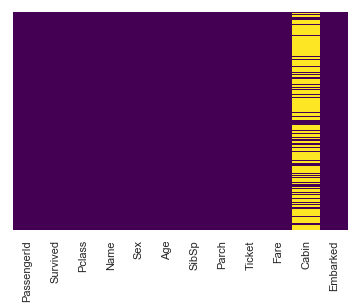

In [ ]:
print(# check missing values in train data
data.isnull().sum())
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Drop the Cabin column 

In [ ]:
data.drop('Cabin',axis=1,inplace=True)

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


There are only 2 missing values for "Embarked", so we can just impute with the port where most people boarded.

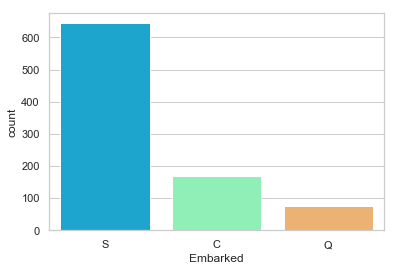

In [ ]:
sns.countplot(x='Embarked',data=data,palette='rainbow')
plt.show()

The most passengers boarded in Southhampton, so we'll impute those 2 NaN's with "S".

In [ ]:
data["Embarked"].fillna("S", inplace=True)

### Converting Categorical Features 

Convert categorical variable into dummy/indicator variables otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data = pd.get_dummies(data, columns=['Sex','Embarked','Pclass'],drop_first=True)
data.head(3)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1


#### Drop those feature that in your opinion are not relevant for the model

In [ ]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Age         714 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    uint8  
 6   Embarked_Q  891 non-null    uint8  
 7   Embarked_S  891 non-null    uint8  
 8   Pclass_2    891 non-null    uint8  
 9   Pclass_3    891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


### Deal with missing values using Imputer

And Imputer versus Iterative Imputer

#### Simple Imputer

In [14]:
import numpy as np
from sklearn.impute import SimpleImputer

data_fixed_1 = data_origin.copy()
imp_1 = SimpleImputer(missing_values=np.nan, strategy="median")
data_fixed_1 = pd.get_dummies(data, columns=['Sex','Embarked','Pclass'],drop_first=True)
data_fixed_1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data_fixed_1.head(3)
data_array_1 = imp_1.fit_transform(data_fixed_1)

In [15]:
data_fixed_df_1 = pd.DataFrame(data_array_1, columns=['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3'])

In [16]:
data_fixed_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
 8   Pclass_2    891 non-null    float64
 9   Pclass_3    891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


In [17]:
data_fixed_df_1.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0,0.0,0.0
2,1.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0,0.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0,0.0,0.0
4,0.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0,0.0,1.0


/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Survived')

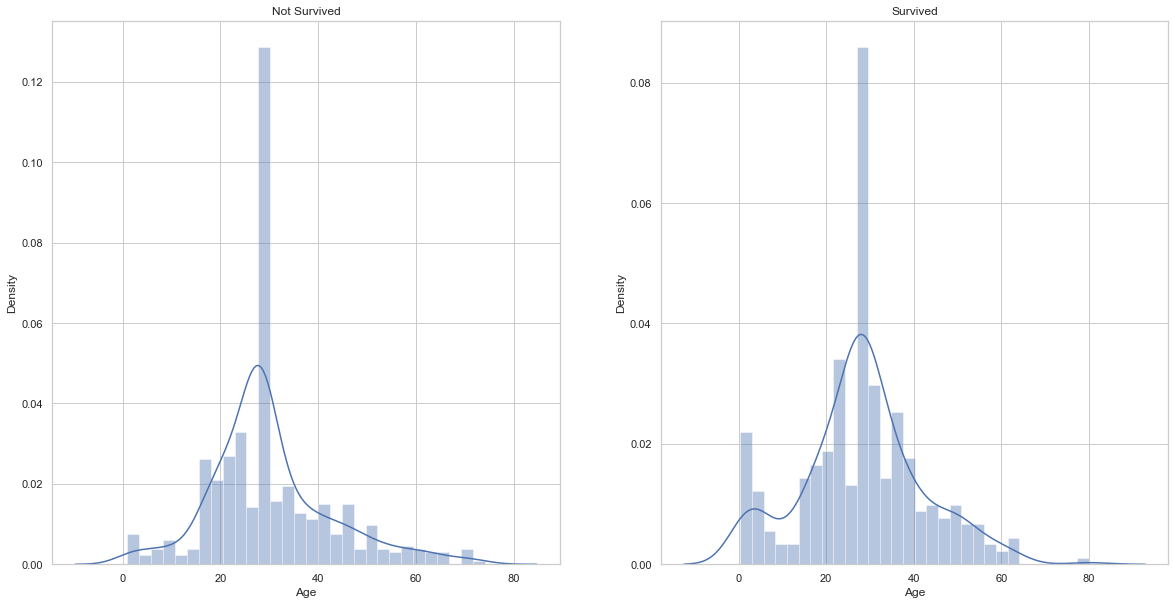

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(data_fixed_df_1[data_fixed_df_1['Survived']==0]['Age'], bins=30, ax=ax[0]);
ax[0].set_title('Not Survived')

sns.distplot(data_fixed_df_1[data_fixed_df_1['Survived']==1]['Age'], bins=30, ax=ax[1]);
ax[1].set_title('Survived')

#### Iterative Imputer

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_2 = IterativeImputer(max_iter=50, random_state=0, initial_strategy="median")

data_fixed_2 = data_origin.copy()

data_fixed_2 = pd.get_dummies(data, columns=['Sex','Embarked','Pclass'],drop_first=True)
data_fixed_2.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
data_fixed_2.head(3)
#data_array_2 = imp_1.fit_transform(data_fixed_1)


data_array_imp_2 = imp_2.fit_transform(data_fixed_2)

In [20]:
data_fixed_df_2 = pd.DataFrame(data_array_imp_2, columns=['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3'])

In [21]:
data_fixed_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_Q  891 non-null    float64
 7   Embarked_S  891 non-null    float64
 8   Pclass_2    891 non-null    float64
 9   Pclass_3    891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Survived')

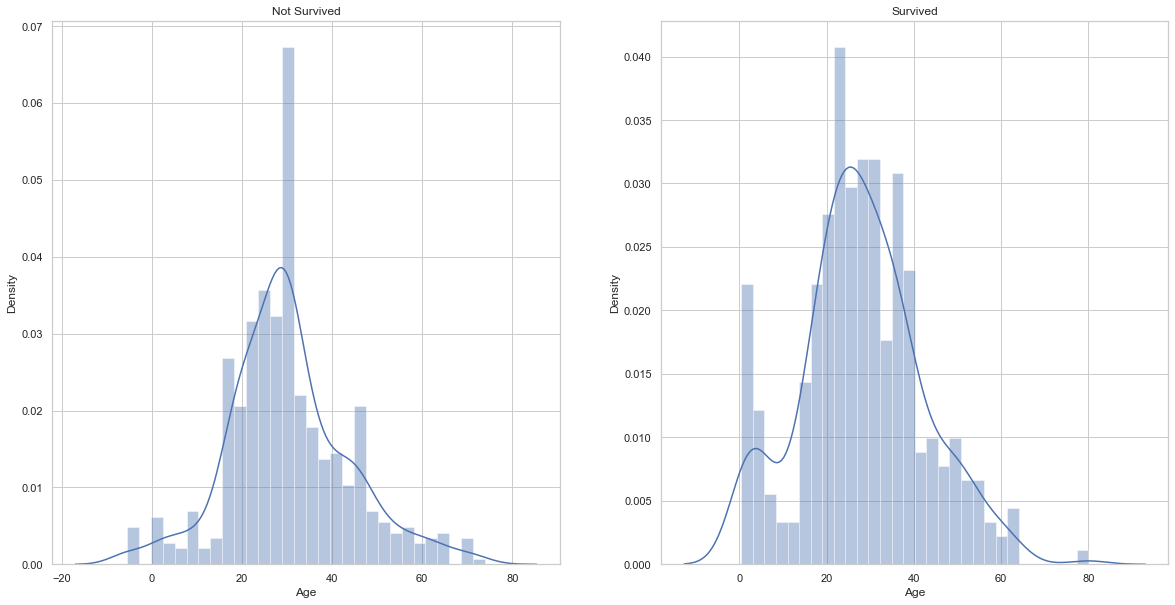

In [22]:
f,ax=plt.subplots(1,2,figsize=(20,10))

sns.distplot(data_fixed_df_2[data_fixed_df_2['Survived']==0]['Age'], bins=30, ax=ax[0]);
ax[0].set_title('Not Survived')

sns.distplot(data_fixed_df_2[data_fixed_df_2['Survived']==1]['Age'], bins=30, ax=ax[1]);
ax[1].set_title('Survived')

Great! Our data is ready for our model!

## Building a Logistic Regression model

Let's start by splitting our data into a training set and test set. Use 30% of the data as test set and set random_state=101

We will use the data from the Iterative Imputer

### Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data_fixed_df_2.drop('Survived',axis=1), 
                                                    data_fixed_df_2['Survived'], test_size=0.30, 
                                                    random_state=101)

### Training and Predicting

In [25]:
from sklearn.linear_model import LogisticRegression

In [28]:
logmodel = LogisticRegression(max_iter=200)
logmodel.fit(X_train,y_train)

LogisticRegression(max_iter=200)

In [29]:
predictions = logmodel.predict(X_test)

### Model Evaluation

We can check **precision, recall, f1-score** using classification report!

In [30]:
from sklearn.metrics import classification_report


In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.90      0.84       154
         1.0       0.83      0.67      0.74       114

    accuracy                           0.80       268
   macro avg       0.81      0.78      0.79       268
weighted avg       0.80      0.80      0.79       268



You might want to explore other feature engineering like:

* Create age groups
* From SibSip creaate a binary column ```Alone```
* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* ...
* BE CREATIVE!


##### Age groups

In [ ]:
bins = [0, 12, 17, 60, np.inf]
labels = ['child', 'teenager', 'adult', 'elder']
age_groups = pd.cut(data.Age, bins, labels=labels)
data['age_group'] = age_groups
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,age_group
0,0,22.0,1,0,7.2500,1,0,1,0,1,adult
1,1,38.0,1,0,71.2833,0,0,0,0,0,adult
2,1,26.0,0,0,7.9250,0,0,1,0,1,adult
3,1,35.0,1,0,53.1000,0,0,1,0,0,adult
4,0,35.0,0,0,8.0500,1,0,1,0,1,adult


In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/vfp1/bts-cda-2020/main/Session_2/titanic.csv')
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data.head(3)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [ ]:
data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [ ]:
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')